# <span style = "color:#FFFFFF; background-color: #FF99AA"> Reuters 딥러닝 모델</span>

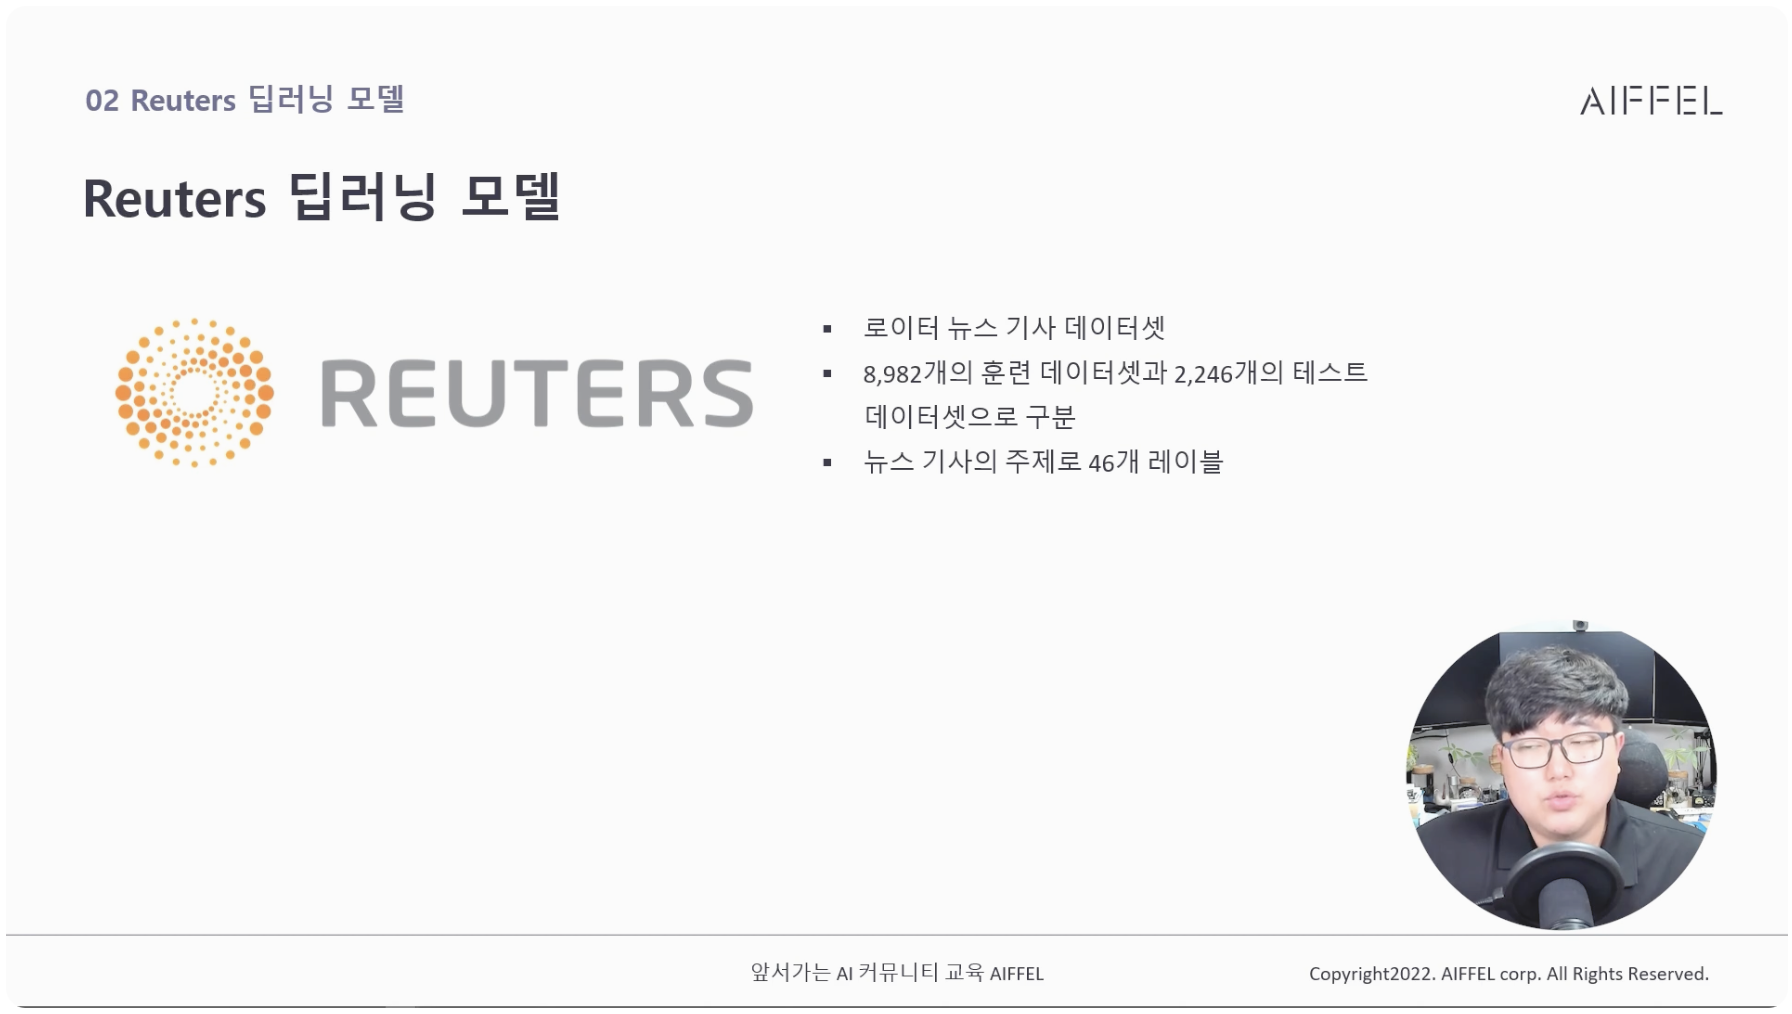

### <span style = "background-color: #FFDDE5"> 데이터 로드 및 전처리</span>
---
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 **`keras.datasets`** 에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 **`train_test_split`** 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data_full, train_labels_full,
                                                                 test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 **`to_categorical()`** 함수를 사용해 변환합니다.

In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### <span style = "background-color: #FFDDE5"> 모델 구성 및 컴파일</span>
---
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.
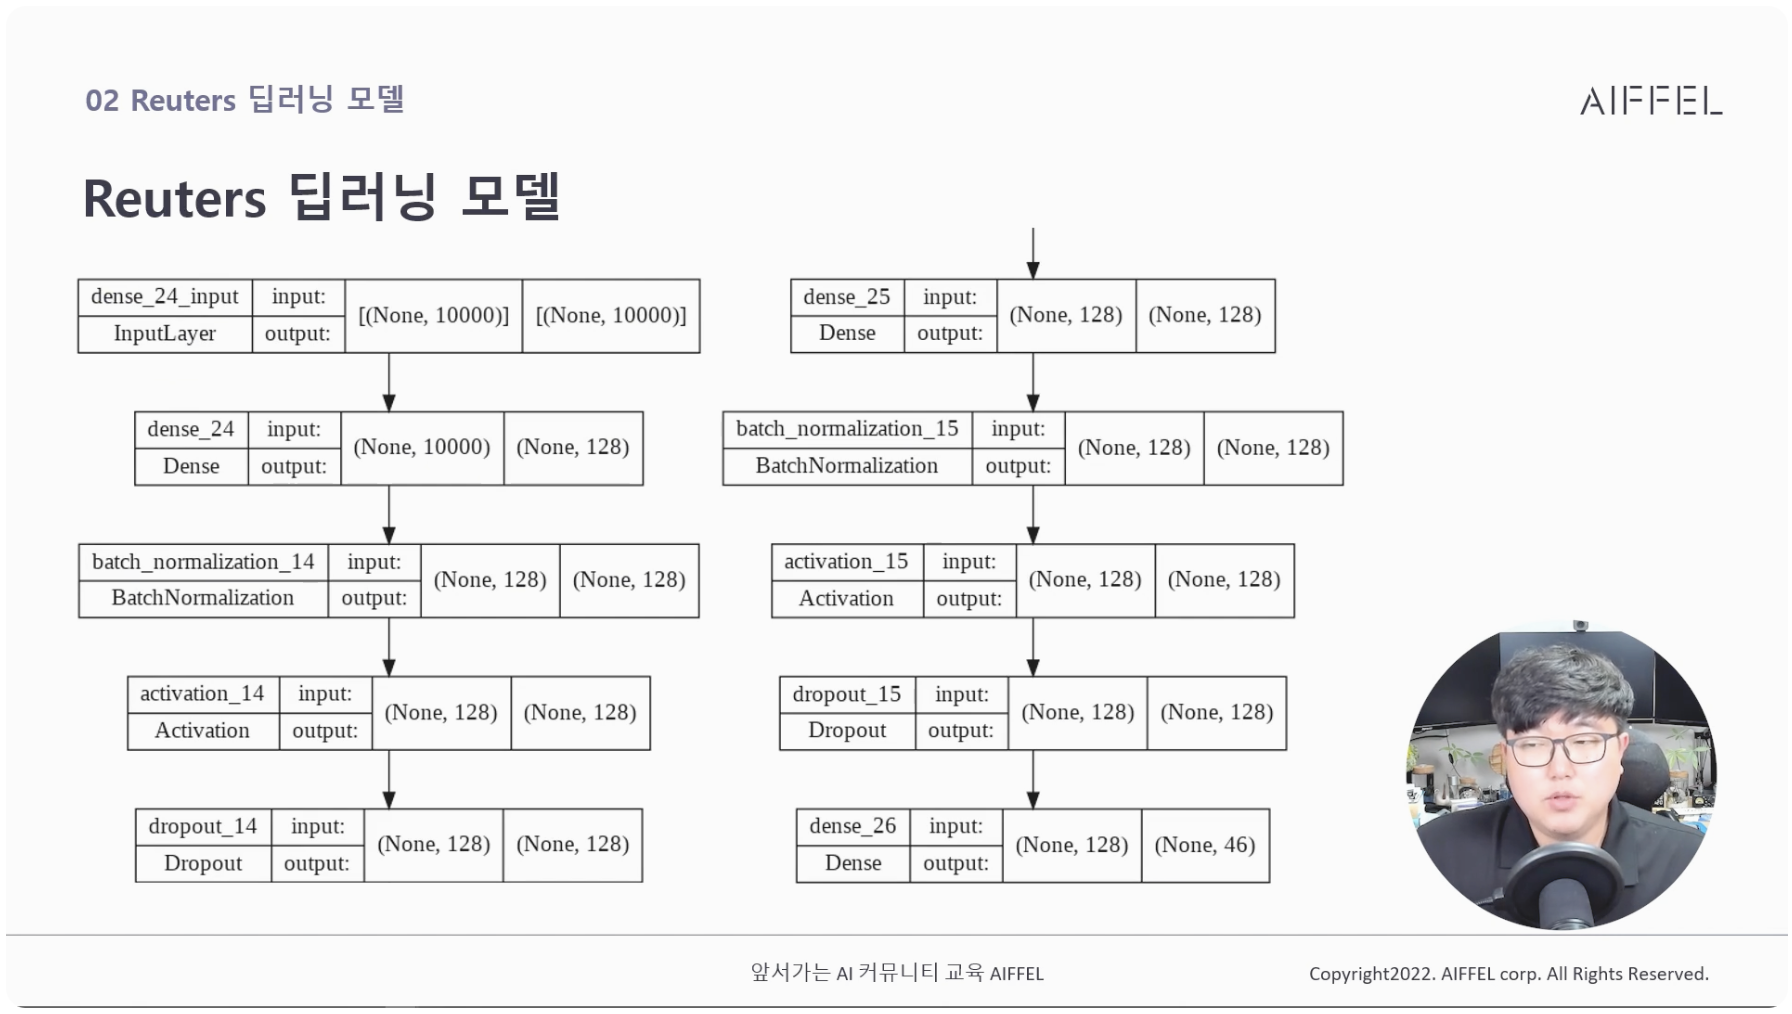

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()

### 비교대조의 편의를 위하여 제시 모델 구조도와 동일한 레이어명 사용
model.add(layers.Input(shape=(10000,), name='dense_24_input'))

model.add(layers.Dense(128, name='dense_24'))
model.add(layers.BatchNormalization(name='batch_normalization_14'))
model.add(layers.Activation('relu', name='activation_14')) 
model.add(layers.Dropout(0.5, name='dropout_14'))

model.add(layers.Dense(128, name='dense_25'))
model.add(layers.BatchNormalization(name='batch_normalization_15'))
model.add(layers.Activation('relu', name='activation_15')) 
model.add(layers.Dropout(0.5, name='dropout_15'))

model.add(layers.Dense(46, activation='softmax', name='dense_26'))



model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0

### <span style = "background-color: #FFDDE5"> 모델 학습</span>
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [6]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 2s 48ms/step - loss: 2.8749 - accuracy: 0.3833 - val_loss: 3.3279 - val_accuracy: 0.6661
Epoch 2/40
14/14 [==============================] - 0s 16ms/step - loss: 1.6811 - accuracy: 0.6493 - val_loss: 3.0417 - val_accuracy: 0.7053
Epoch 3/40
14/14 [==============================] - 0s 17ms/step - loss: 1.3260 - accuracy: 0.7080 - val_loss: 2.7944 - val_accuracy: 0.7257
Epoch 4/40
14/14 [==============================] - 0s 17ms/step - loss: 1.1255 - accuracy: 0.7481 - val_loss: 2.5645 - val_accuracy: 0.7333
Epoch 5/40
14/14 [==============================] - 0s 18ms/step - loss: 0.9895 - accuracy: 0.7706 - val_loss: 2.3222 - val_accuracy: 0.7444
Epoch 6/40
14/14 [==============================] - 0s 16ms/step - loss: 0.8764 - accuracy: 0.7975 - val_loss: 2.1528 - val_accuracy: 0.7502
Epoch 7/40
14/14 [==============================] - 0s 16ms/step - loss: 0.7967 - accuracy: 0.8126 - val_loss: 1.9642 - val_accuracy: 0.7680
Epoch 8/40
14

- 학습 히스토리의 **`loss`**, **`val_loss`**, **`accuracy`**, **`val_accuracy`** 를 차트로 시각화합니다.
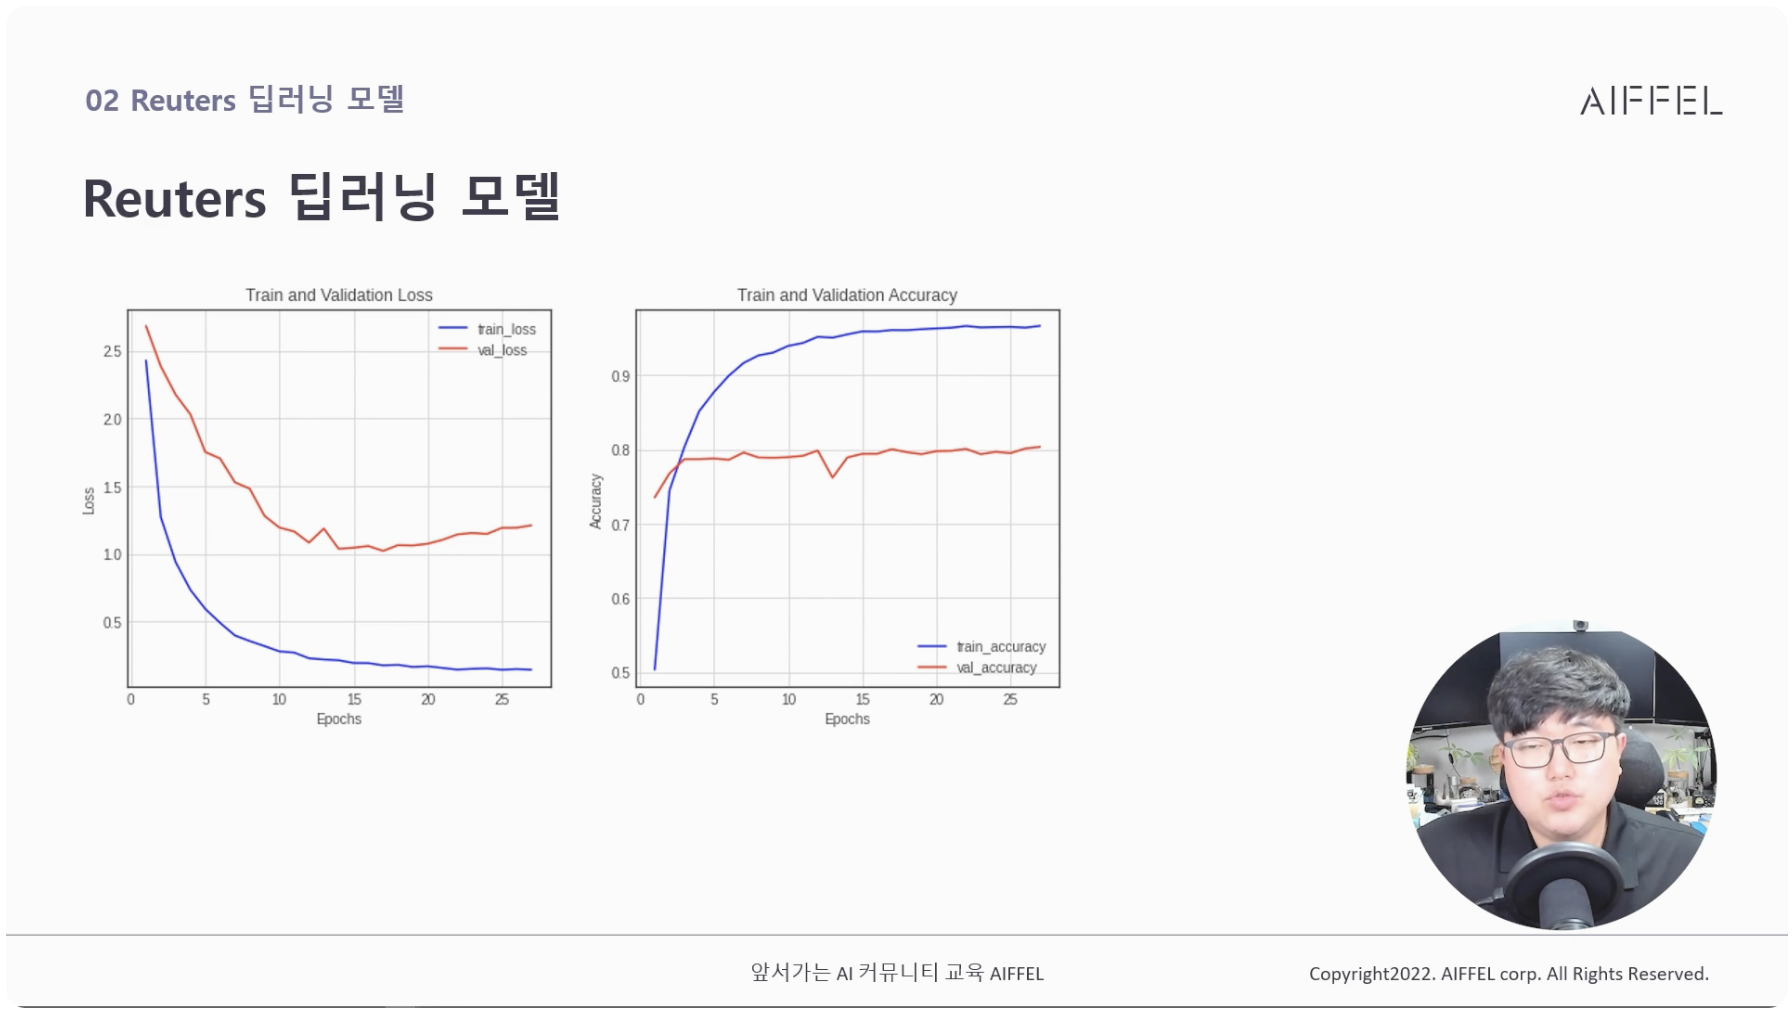

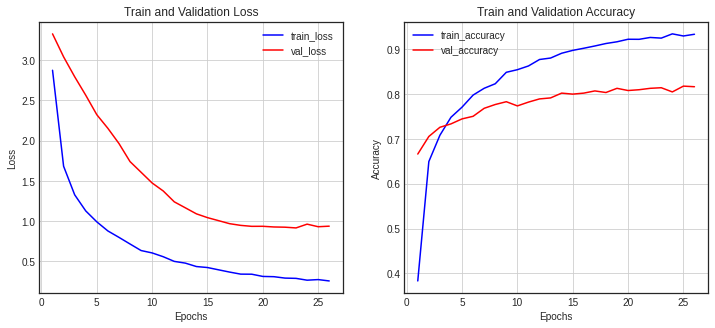

In [7]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

### train_loss, val_loss 비교를 위한 그래프 작성
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

### train_accuracy, val_accuracy 비교를 위한 그래프 작성
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### <span style = "background-color: #FFDDE5"> 모델 평가 및 예측</span>
---
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [8]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9837 - accuracy: 0.8028


[0.983710527420044, 0.8027604818344116]

---
**회고록**  
batch normalization, dropout이 적용된 2개의 Dense 레이어와 softmax 함수가 적용된 1개의 Dense 레이어로 구성된 모델을 이용한 학습 결과, 제시된 시각화 그래프와 유사한 양상을 보였다.  
epochs를 거듭할수록 loss는 줄어들고 accuracy는 늘어나는 양상을 보였으나, epochs 약 25 이상부터는 그 변동폭이 미미하여 early stopping을 통해 training을 사전에 종료하였다.  

이전까지의 프로젝트는 제시된 학습 모델 코드를 그대로 활용하는 방식으로 TensorFlow 프로그래밍에 관한 이해도를 높이기 어려웠는데,  
이번 프로젝트에서는 간단한 구조의 모델나마 직접 코드를 작성하고 구현해볼 수 있어서 굉장히 뿌듯했다 🥹